## Feature Extraction 
Feature extraction is a part of the dimensionality reduction process, in which, an initial set of the raw data is divided and reduced to more manageable groups. Feature extraction helps to get the best feature from those big data sets by selecting and combining variables into features.

Feature Selection Vs Feature Extraction: The difference between Feature Selection and Feature Extraction is that feature selection aims instead to rank the importance of the existing features in the dataset and discard less important ones (no new features are created).

 Advantages of Feature Extraction:
1. Accuracy improvements.
2. Overfitting risk reduction.
3. Speed up in training.
4. Improved Data Visualization.
5. Reduces the dimensionality
6. Increase in explainability of our model.

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [73]:
wine = datasets.load_wine()

X = wine.data
y = wine.target
labels = wine.target_names
X.shape, len(labels)

((178, 13), 3)

In [74]:
# lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
# pca = PCA(n_components=2).fit_transform(X)

In [75]:
col = ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od315_of_diluted_wines',
 'proline']

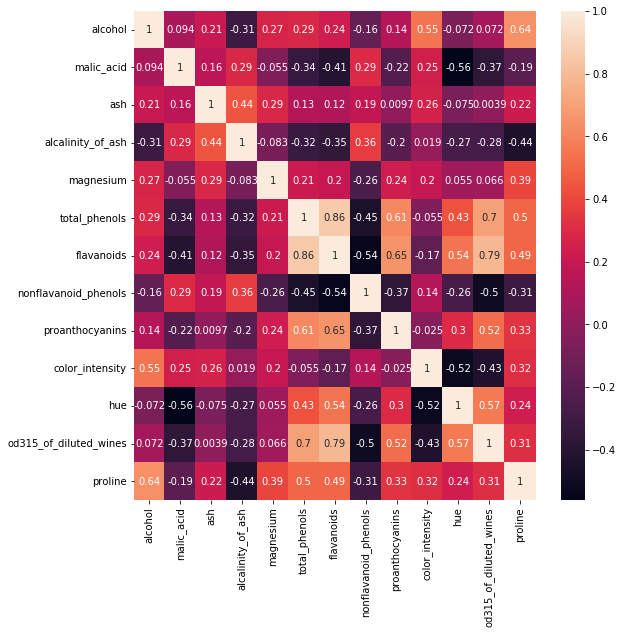

In [76]:
plt.figure(figsize=(9,9))
sns.heatmap(pd.DataFrame(X, columns=col).corr(), annot=True)

In [77]:
X_scaled = StandardScaler().fit_transform(X)

### 1. Principal Component Analysis(PCA)
- Principal Component Analysis is a mathematical technique used for dimensionality reduction. Its goal is to reduce the number of features whilst keeping most of the original information.
- It identifies correlations and pattern in a dataset so that it can be transformed into a dataset of significantly lower dimension without loss of any important information.
- Very correlated independent variables will give a highly biased result based on these variables and this can be handled using PCA. Also it can be used for Visualizing the data in 2 dimension or 3 dimensions.
- This is done by first converting the data into standardized data. Standardized data have a mean of 0 and a standard deviation of 1.
- Computing the covariance matrix: Covariance is a measure of how changes in one variable are associated with changes in a second variable. It identifies heavily dependent variables.
- Calculating EigenVector and EigenValues: 
    1. EigenVector: Those vectors when a linear transformation is performed on them then their direction does not change.
    2. EigenValues: It denotes the scalars of the respective EigenVectors.

- In order to select directions of highest variance you need to first find eigen vectors which is direct measure of variance I.e. larger the eigen value, larger the variance in that direction which can be found from the covariance matrix.

Algo:
1. Taking all the independent variables in X variable.
2. Standardizing the independent variables
3. Calculating the covariance matrix
4. Calculating the eigenvector and eigenvalues
5. Calculate the percentage of explained variance per principal component:

Text(0, 0.5, 'PC 2')

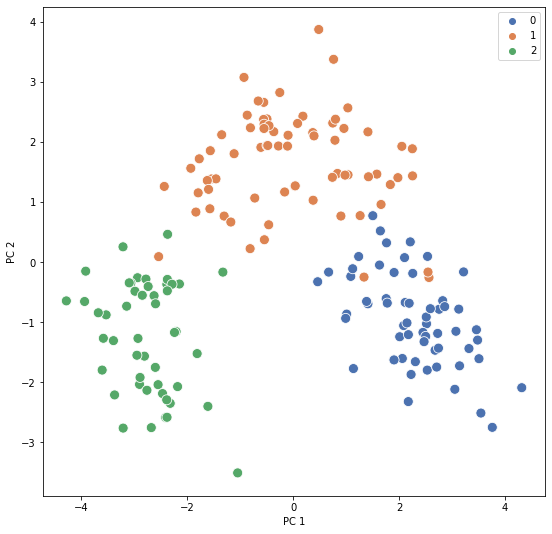

In [78]:
pca=PCA(n_components = 2)
pca.fit(X_scaled)

plt.figure(figsize=(9,9))
fig = sns.scatterplot(x = pca.fit_transform(X_scaled)[:,0], 
                      y= pca.fit_transform(X_scaled)[:,1],
                      hue=y, 
                      palette='deep',
                      s=100)

fig.set_xlabel('PC 1')
fig.set_ylabel('PC 2')

- whitenbool, default=False
When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs

- svd_solver{‘auto’, ‘full’, ‘arpack’, ‘randomized’}, default=’auto’
If auto :
The solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.

    a. If full :
    run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd 

    b. If arpack :
    run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < min(X.shape)

In [79]:
print('Variance explained by the 2 Principla components:\n',pca.explained_variance_ratio_.sum()*100)

Variance explained by the 2 Principla components:
 55.406338356935315


### 2. LDA (Linear Discriminant Analysis)

- LDA is commonly used for supervised classification problems. 
- LDA is like PCA but instead of focussing on the maximizing the variance, it focusses on maximizing the separatability among categories.
- Linear Discriminant Analysis uses both the axes (X and Y) to create a new axis and projects data onto a new axis in a way to maximize the separation of the two categories and minimizes the variance within the category and hence, reducing the 2D graph into a 1D graph. 

In [80]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, y)


LinearDiscriminantAnalysis(n_components=2)

[Text(0, 0.5, 'lda 2'), Text(0.5, 0, 'lda 1')]

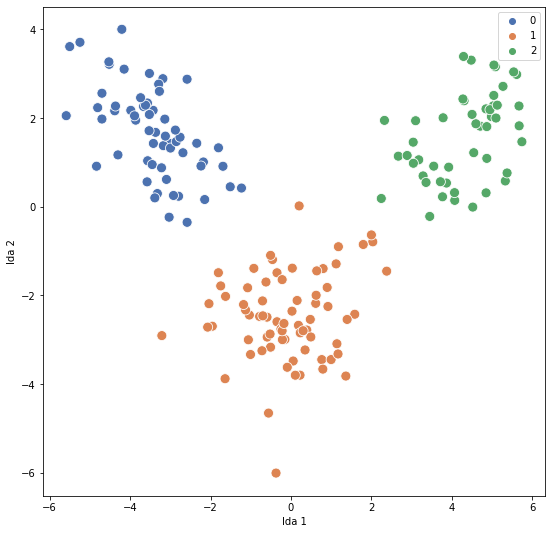

In [81]:
plt.figure(figsize=(9,9))
fig = sns.scatterplot(x= lda.fit_transform(X_scaled, y)[:,0], 
                      y = lda.fit_transform(X_scaled, y)[:,1], 
                      hue=y, s=100, palette = 'deep')
fig.set(xlabel='lda 1', ylabel='lda 2')

[Text(0, 0.5, 'lda 2'), Text(0.5, 0, 'lda 1'), Text(0.5, 1.0, 'LDA')]

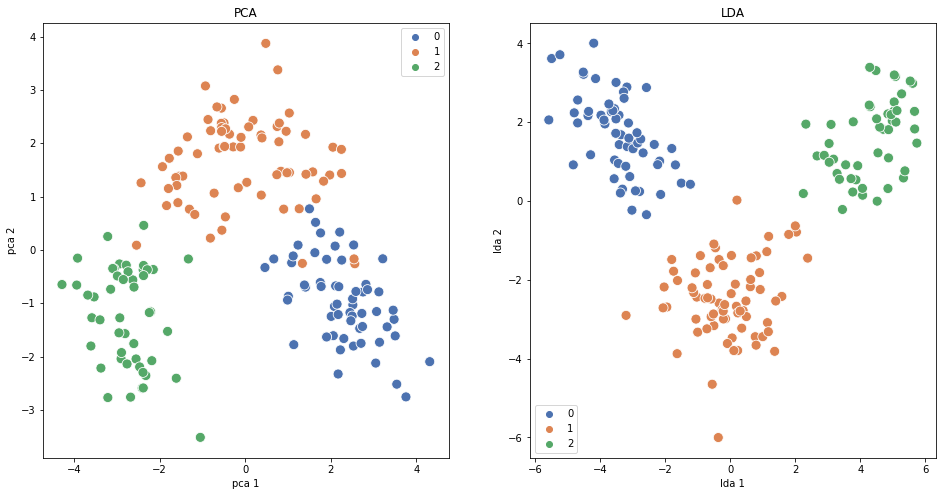

In [82]:
pca=PCA(n_components = 2)
pca.fit(X_scaled)

f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x = pca.fit_transform(X_scaled)[:,0], 
                  y= pca.fit_transform(X_scaled)[:,1],
                  hue=y, palette='deep', s=100, ax=axes[0])

sns.scatterplot(x= lda.fit_transform(X_scaled, y)[:,0], 
                y = lda.fit_transform(X_scaled, y)[:,1], 
                hue=y, s=100, palette = 'deep', ax = axes[1])

axes[0].set(xlabel='pca 1', ylabel='pca 2', title='PCA')
axes[1].set(xlabel='lda 1', ylabel='lda 2', title='LDA')

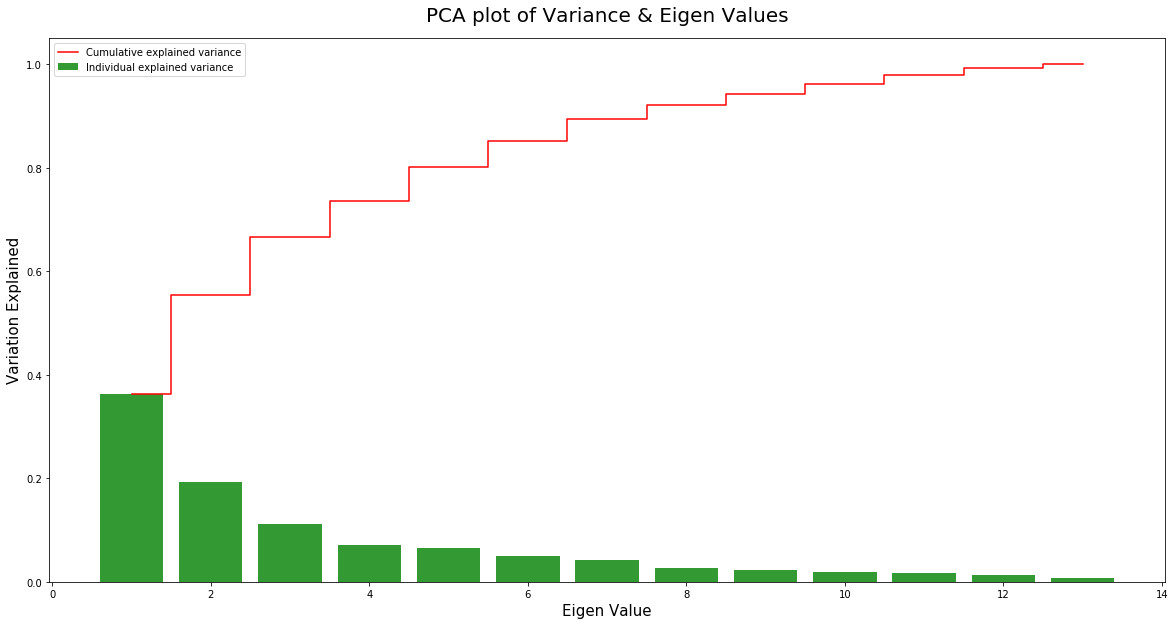

In [83]:
pca=PCA()
pca.fit(X_scaled)

plt.figure(figsize=(20,10))
plt.bar(list(range(1,14)), pca.explained_variance_ratio_ , alpha=0.8, align='center', color='Green', label = 'Individual explained variance')
plt.step(list(range(1,14)), np.cumsum(pca.explained_variance_ratio_), where='mid', color='Red', label = 'Cumulative explained variance')
plt.ylabel('Variation Explained', y=0.5, size=15)
plt.xlabel('Eigen Value', size=15)
plt.title('PCA plot of Variance & Eigen Values',y=1.02, size=20 )
plt.legend(loc='best')
plt.show()

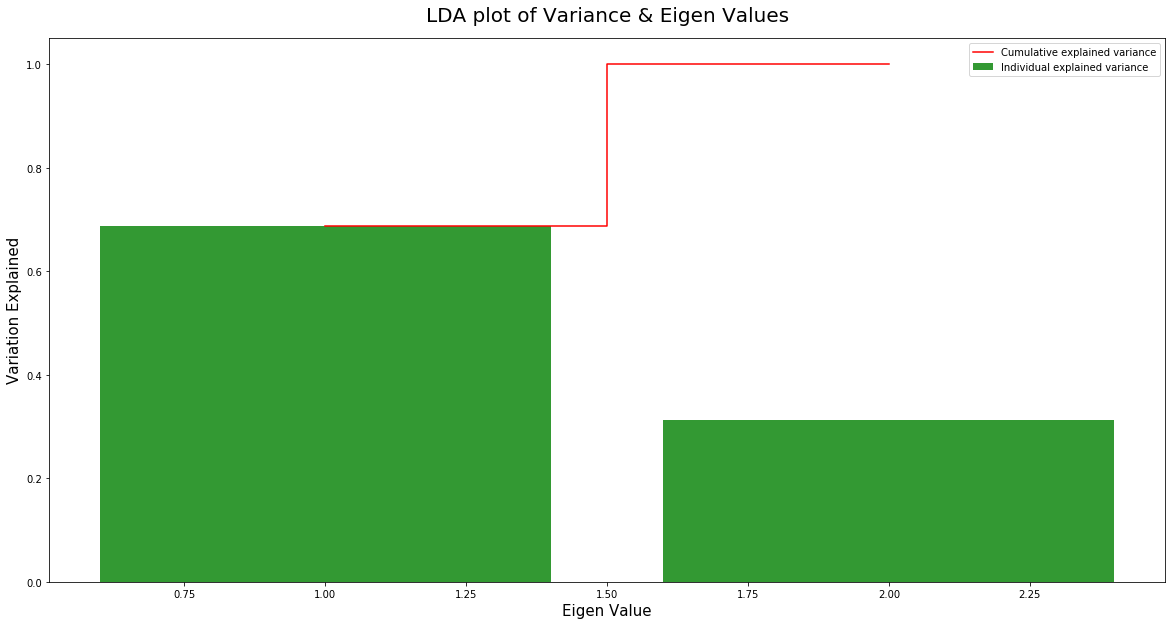

In [84]:
# lda = LinearDiscriminantAnalysis().fit(X, y).transform(X)
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)


plt.figure(figsize=(20,10))
plt.bar(list(range(1,3)), lda.explained_variance_ratio_ , alpha=0.8, align='center', color='Green', label = 'Individual explained variance')
plt.step(list(range(1,3)), np.cumsum(lda.explained_variance_ratio_), where='mid', color='Red', label = 'Cumulative explained variance')
plt.ylabel('Variation Explained', y=0.5, size=15)
plt.xlabel('Eigen Value', size=15)
plt.title('LDA plot of Variance & Eigen Values',y=1.02, size=20 )
plt.legend(loc='best')
plt.show()

### Result Comparison

In [85]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [87]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)

pred=model.predict(x_train)
print('Accuracy Score:',accuracy_score(pred,y_train))
print('Accuracy Score:',accuracy_score(model.predict(x_test), y_test))

Accuracy Score: 1.0
Accuracy Score: 1.0


In [88]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
clf.fit(x_train, y_train)

pred_train=clf.predict(x_train)
print('Accuracy Score:',accuracy_score(pred_train,y_train))
pred_test=clf.predict(x_test)
print('Accuracy Score:',accuracy_score(pred_test,y_test))

Accuracy Score: 1.0
Accuracy Score: 0.9777777777777777


### t-sne (t-Distributed Stochastic Neighbor Embedding)

- t-SNE is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data.

1. Measure similarities between points in the high dimensional space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij).
2. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.
3. Similar to step 1, but instead of using a Gaussian distribution you use a Student t-distribution. This gives us a second set of probabilities (Qij) in the low dimensional space. The t-distribution has heavier tails than the normal distribution(allow for better modeling of far apart distances).
4. We want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible.



- t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features. But it is not a clustering algorithm it is a dimensionality reduction algorithm. This is because it maps the multi-dimensional data to a lower dimensional space, the input features are no longer identifiable.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(178, 2)


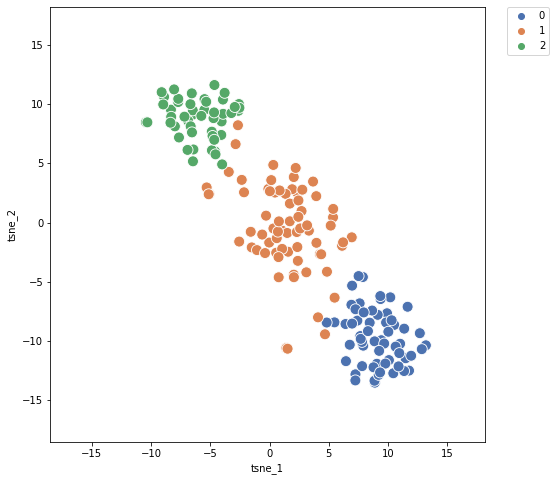

In [89]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=5000)
tsne_result = tsne.fit_transform(X_scaled)
print(tsne_result.shape)
# (178, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize=(16, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, palette='deep')
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

### REAL LIFE DATA

In [90]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
df = pd.read_csv(url, header=None)
data = df.values
print(df.shape)

X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(214, 10)
(214, 9) (214,)


In [91]:
print(df)

           0      1     2     3      4     5     6     7    8  9
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0  1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0  1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0  1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0  1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0  1
..       ...    ...   ...   ...    ...   ...   ...   ...  ... ..
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0  7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0  7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0  7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0  7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0  7

[214 rows x 10 columns]


In [92]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

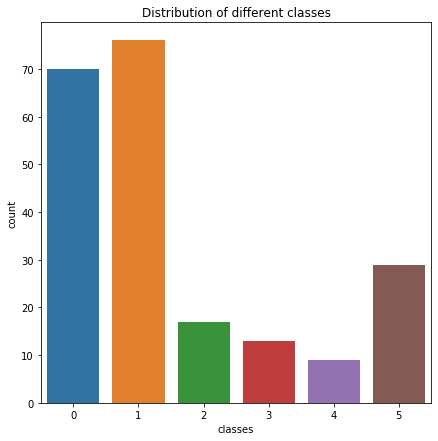

In [93]:
from collections import Counter

counter = Counter(y)

plt.figure(figsize=(7, 7))
fig = sns.barplot(x = list(counter.keys()), y = list(counter.values()))
fig = fig.set(xlabel='classes', ylabel='count', title='Distribution of different classes')

In [94]:
X_scaled = StandardScaler().fit_transform(X)

[Text(0, 0.5, 'lda 2'), Text(0.5, 0, 'lda 1'), Text(0.5, 1.0, 'LDA')]

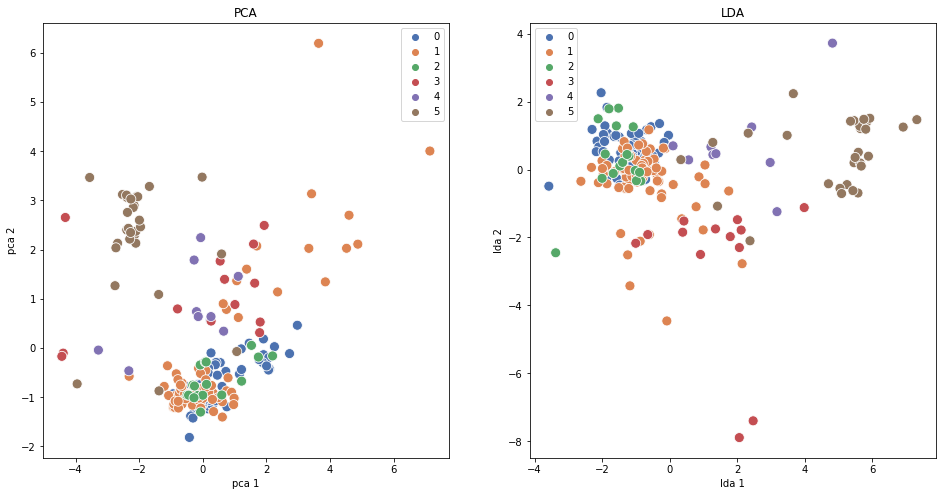

In [95]:
pca=PCA(n_components = 2)
pca.fit(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, y)

f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x = pca.fit_transform(X_scaled)[:,0], 
                  y= pca.fit_transform(X_scaled)[:,1],
                  hue=y, palette='deep', s=100, ax=axes[0])

sns.scatterplot(x= lda.fit_transform(X_scaled, y)[:,0], 
                y = lda.fit_transform(X_scaled, y)[:,1], 
                hue=y, s=100, palette = 'deep', ax = axes[1])

axes[0].set(xlabel='pca 1', ylabel='pca 2', title='PCA')
axes[1].set(xlabel='lda 1', ylabel='lda 2', title='LDA')

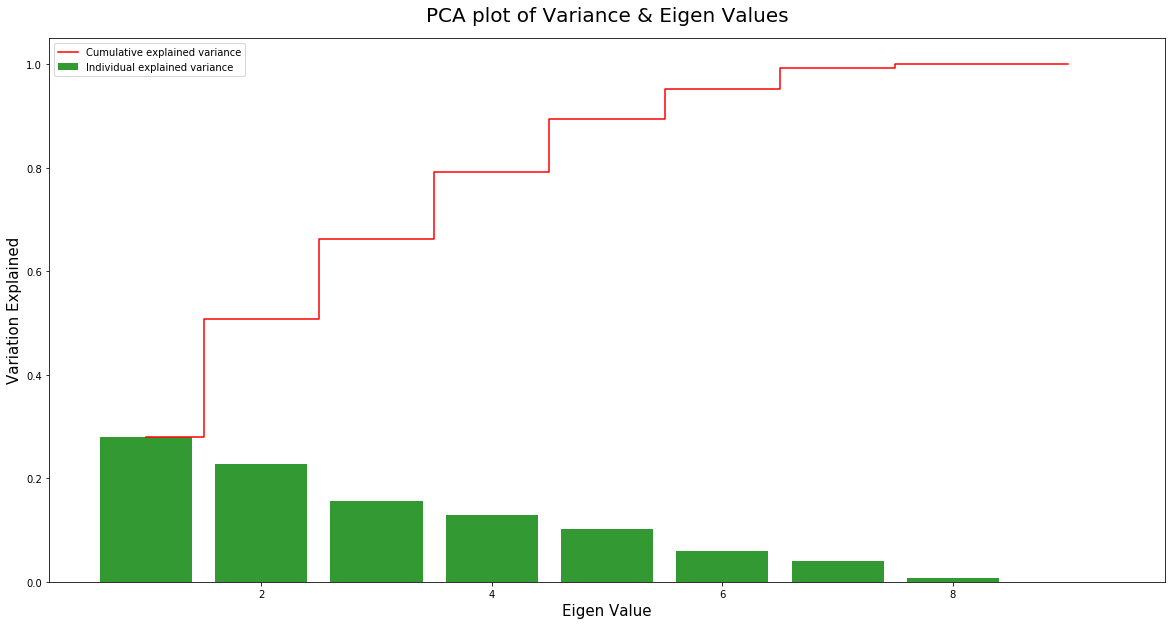

In [96]:
pca=PCA()
pca.fit(X_scaled)

plt.figure(figsize=(20,10))
plt.bar(list(range(1,10)), pca.explained_variance_ratio_ , alpha=0.8, align='center', color='Green', label = 'Individual explained variance')
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_), where='mid', color='Red', label = 'Cumulative explained variance')
plt.ylabel('Variation Explained', y=0.5, size=15)
plt.xlabel('Eigen Value', size=15)
plt.title('PCA plot of Variance & Eigen Values',y=1.02, size=20 )
plt.legend(loc='best')
plt.show()

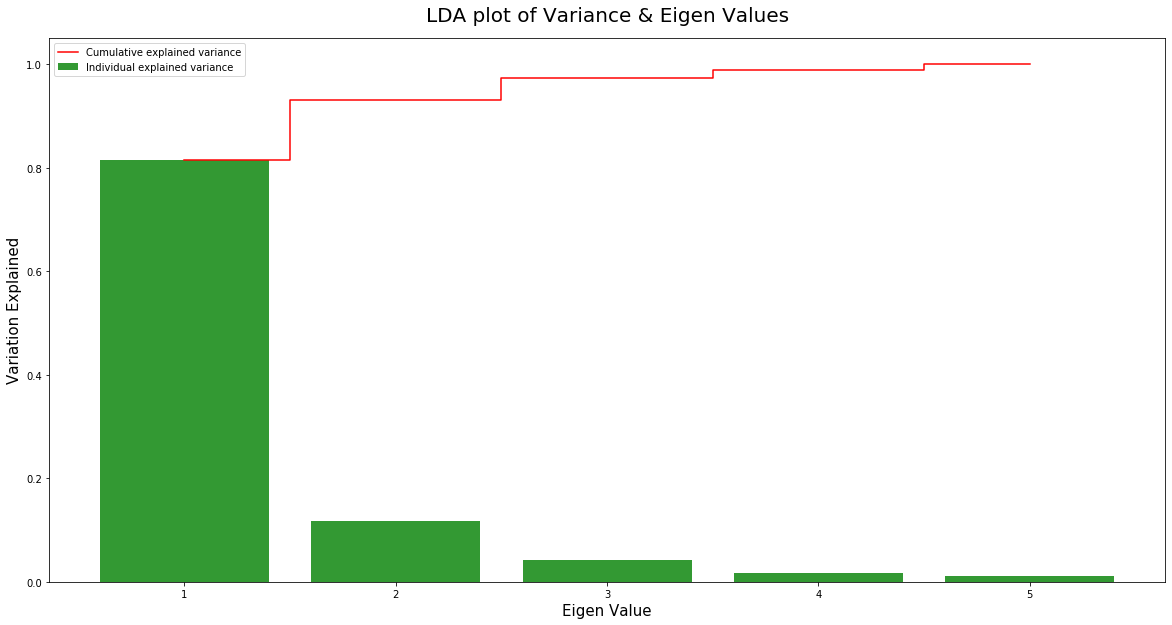

In [97]:
# lda = LinearDiscriminantAnalysis().fit(X, y).transform(X)
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)


plt.figure(figsize=(20,10))
plt.bar(list(range(1,6)), lda.explained_variance_ratio_ , alpha=0.8, align='center', color='Green', label = 'Individual explained variance')
plt.step(list(range(1,6)), np.cumsum(lda.explained_variance_ratio_), where='mid', color='Red', label = 'Cumulative explained variance')
plt.ylabel('Variation Explained', y=0.5, size=15)
plt.xlabel('Eigen Value', size=15)
plt.title('LDA plot of Variance & Eigen Values',y=1.02, size=20 )
plt.legend(loc='best')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y)

### Without Data Reduction

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=10, n_estimators=8)
model.fit(x_train,y_train)

pred_train=model.predict(x_train)
print('Accuracy Score:',accuracy_score(pred_train,y_train))
pred_test=model.predict(x_test)
print('Accuracy Score:',accuracy_score(pred_test,y_test))

Accuracy Score: 0.98125
Accuracy Score: 0.7407407407407407


### With PCA

In [100]:
PCA_train = pd.DataFrame(pca.fit_transform(x_train)) #[:, :6]
PCA_test = pd.DataFrame(pca.transform(x_test)) # [:, :6]

model.fit(PCA_train,y_train)

pred_train=model.predict(PCA_train)
print('Accuracy Score:',accuracy_score(pred_train,y_train))
pred_test=model.predict(PCA_test)
print('Accuracy Score:',accuracy_score(pred_test,y_test))

Accuracy Score: 0.9625
Accuracy Score: 0.6111111111111112


### With LDA

In [101]:
LDA_train = pd.DataFrame(lda.fit_transform(x_train, y_train))
LDA_test = pd.DataFrame(lda.transform(x_test, ))

model.fit(LDA_train,y_train)

pred_train=model.predict(LDA_train)
print('Accuracy Score:',accuracy_score(pred_train,y_train))
pred_test=model.predict(LDA_test)
print('Accuracy Score:',accuracy_score(pred_test,y_test))

Accuracy Score: 0.98125
Accuracy Score: 0.5


### t-sne (t-Distributed Stochastic Neighbor Embedding)

- t-SNE is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data.

1. Measure similarities between points in the high dimensional space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij).
2. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.
3. Similar to step 1, but instead of using a Gaussian distribution you use a Student t-distribution. This gives us a second set of probabilities (Qij) in the low dimensional space. The t-distribution has heavier tails than the normal distribution(allow for better modeling of far apart distances).
4. We want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible.



- t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features. But it is not a clustering algorithm it is a dimensionality reduction algorithm. This is because it maps the multi-dimensional data to a lower dimensional space, the input features are no longer identifiable.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(214, 2)


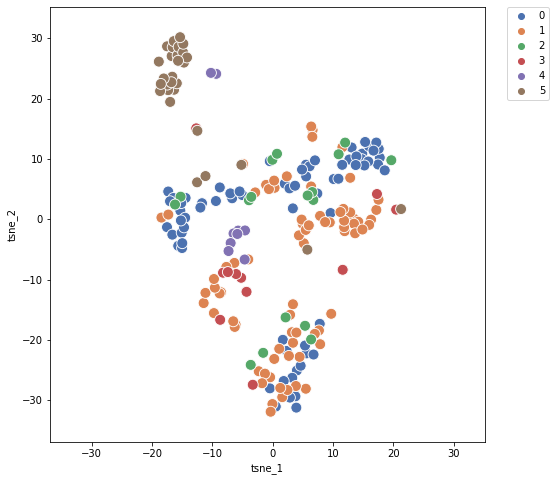

In [102]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, n_iter=5000)
tsne_result = tsne.fit_transform(X_scaled)
print(tsne_result.shape)
# (214, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize=(16, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, palette='deep')
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## Feature Engineering

It involves transforming data to forms that better relate to the underlying target to be learned.  When done right, feature engineering can augment the value of your existing data and improve the performance of your machine learning models. On the other hand, using bad features may require you to build much more complex models to achieve the same level of performance.

In [103]:
data1 = pd.read_csv('titanic_train.csv')
print(data1.shape)
data1.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1. Mean/ Median/ Mode for Missing Data Imputation

In [105]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age is to be considered as a continuous variables whereas Cabin and Embarked are categorical variable.

For Age we will replace the missing values with the mean of the Age column.

In [106]:
# impute missing values in age in train and test set
median = data1.Age.median()
print(median)
data1['Age'].fillna(median, inplace=True)

28.0


For Embarked column replace the missing values with the most frequent value.

In [107]:
print(data1['Embarked'].value_counts().idxmax())
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].value_counts().idxmax())

S


In cabin column there are around 78% of the values are misssing. Applying imputation wouldn't improve the dataset. Moreover, it is not a limited variable where we have 4 or 5 values, there are around 176 different values.

In [108]:
data1 = data1.drop('Cabin', axis=1)

In [109]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 2. Encoding
Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.
Two different types of Categorical variables:
1. Norminal Data
Nominal categorical variables are those for which we do not have to worry about the arrangement of the categories.
2. Ordinal Data
Ordinal categories are those in which we have to worry about the rank. These categories can be rearranged based on ranks.

**1. Norminal Data**
Use One hot encoding from the sklearn library


In [110]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

enc_gender = pd.DataFrame(enc.fit_transform(data1[['Sex']]).toarray(), columns=['is_male'])
data1 = data1.join(enc_gender)

data1.head()
# enc.get_feature_names(['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0


**2. Ordinal Data** use Label encoding for embarked

In [111]:
label_encoder = LabelEncoder()

data1['labeled_Embarked'] = label_encoder.fit_transform(data1['Embarked'])
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,labeled_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,2


### 3. Binning

In [112]:
ageGroups = ["infant","child","teenager","youngAdult","adult","aged"]

groupRanges = [0,5,12,18,35,60,81]

data1["ageBinned"] = pd.cut(data1.Age, groupRanges, labels = ageGroups)
data1.head()
# display(merged[['Age', 'ageBinned']].head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,labeled_Embarked,ageBinned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,2,youngAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,2,youngAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,2,youngAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,2,youngAdult


In [113]:
fareGroups = ["low","medium","high","veryHigh"]

fareGroupRanges = [0, 130, 260, 390, 520]


data1["fareBinned"] = pd.cut(data1.Fare, fareGroupRanges, labels = fareGroups)
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,labeled_Embarked,ageBinned,fareBinned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,2,youngAdult,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0,adult,low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,2,youngAdult,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,2,youngAdult,low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,2,youngAdult,low


### 4. Transformation
Variable transformation is a way to make the data work better in your model.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


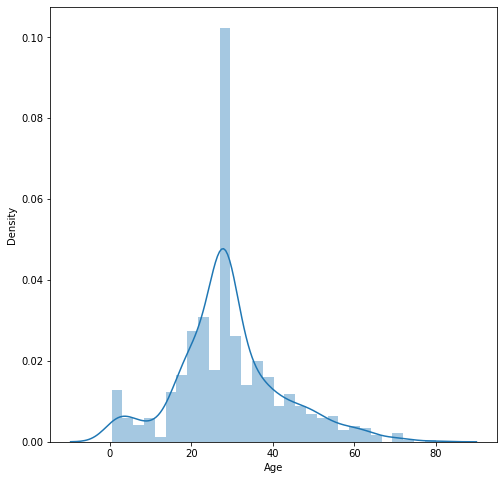

In [114]:
import statsmodels.api as sm

def plots(df, variable):
    plt.figure(figsize=(15,6))
    df[variable].hist()
    plt.show()
plt.figure(figsize=(8, 8))
fig = sns.distplot(data1['Age'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


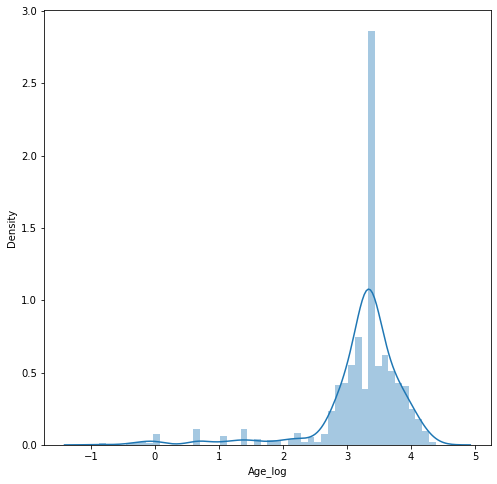

In [115]:
# Logarithmic Transformation
data1['Age_log'] = np.log(data1.Age)
# plots(data1, 'Age_log')
plt.figure(figsize=(8, 8))
fig = sns.distplot(data1['Age_log'])
# Log-transform decreases skew in some distributions, especially with large outliers. 
# But, it may not be useful as well if the original distributed is not skewed. Also, log transform may not be applied to some 
# cases (negative values)

### Normalization
MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. The process of scaling data into a range of [0, 1]. It's more useful and common for regression tasks.
![](https://editor.analyticsvidhya.com/uploads/23887plot4.PNG)

Preserves the shape of the original distribution. Doesn't reduce the importance of outliers. Least disruptive to the information in the original data. Default range for MinMaxScaler is 0 to 1. 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


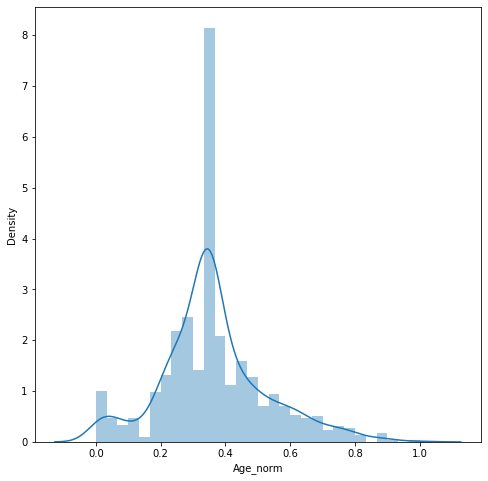

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['Age_norm'] = scaler.fit_transform(data1[['Age', 'Fare']]).T[0]

plt.figure(figsize=(8, 8))
fig = sns.distplot(data1['Age_norm'])

## Standard Scaler
Standardization is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.
![](https://editor.analyticsvidhya.com/uploads/17984plot6.PNG)

Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


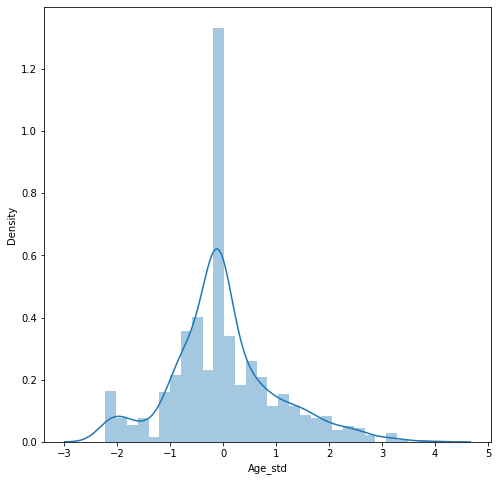

In [117]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
data1['Age_std'] = sc.fit_transform(data1[['Age', 'Fare']]).T[0]

plt.figure(figsize=(8, 8))
fig = sns.distplot(data1['Age_std'])

### Robust Scaler
Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.
![](https://i.stack.imgur.com/G3V7C.png)

Outliers have less influence than with MinMaxScaler. Range is larger than MinMaxScaler.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


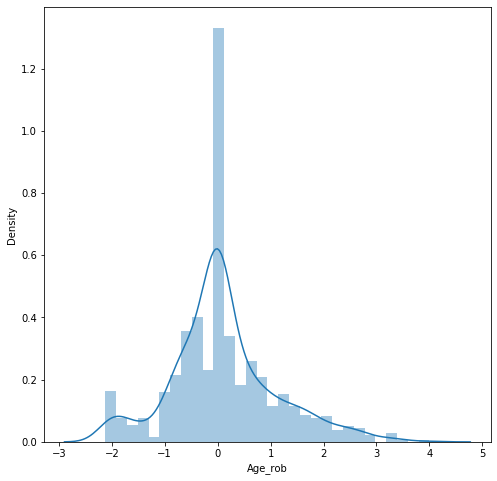

In [118]:
r_scaler = RobustScaler()
data1['Age_rob'] = r_scaler.fit_transform(data1[['Age', 'Fare']]).T[0]

plt.figure(figsize=(8, 8))
fig = sns.distplot(data1['Age_rob'])

## 5. Outlier Treatment
Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

In [119]:
from sklearn import datasets

iris = datasets.load_iris()

# Concatenate along the second axis using np.c_[]
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]


### Detecting the outliers
Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach.

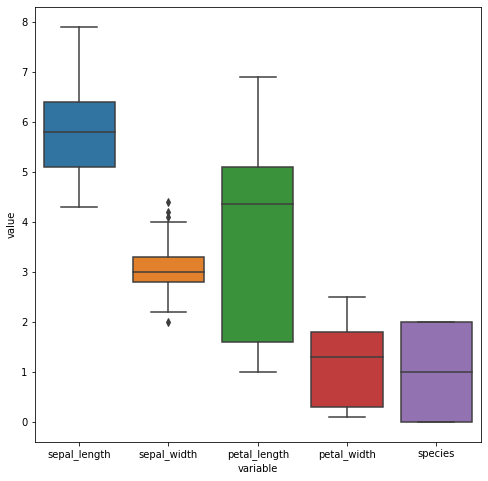

In [120]:
plt.figure(figsize=(8,8))
fig = sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [121]:
Q1 = np.percentile(df['sepal_width'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['sepal_width'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df['sepal_width'].shape)
 
# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))
 
print(f'upper: {len(upper[0])}\n lower: {len(lower[0])}')

Old Shape:  (150,)
upper: 3
 lower: 1


### Handling Outliers
1. Trimming
2. Capping
3. Imputation

1. **Trimming** is a the method of cutting off or getting rid of the outliers at the end of the dataset. This is easier than all the other methods.

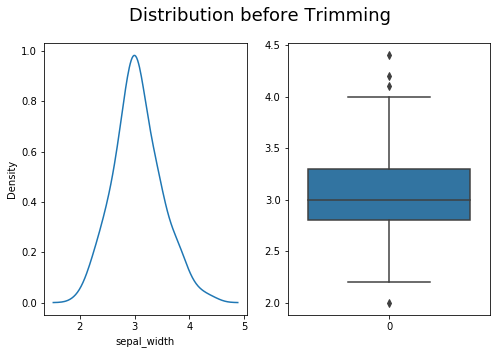

In [122]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['sepal_width'])
plt.subplot(1,2,2)
sns.boxplot(data = df['sepal_width'])
# plt.tight_layout()
plt.show()

In [123]:
print('old shape', df.shape)
temp = df[(df['sepal_width'] < (Q3+1.5*IQR)) & (df['sepal_width'] > (Q1-1.5*IQR))]
print('new shape', temp.shape)

old shape (150, 5)
new shape (146, 5)


In [124]:
len(df[(df['sepal_width'] >= (Q3+1.5*IQR)) | (df['sepal_width'] <= (Q1-1.5*IQR))])

4

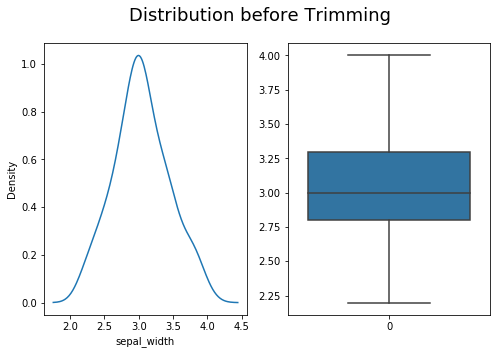

In [125]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = temp['sepal_width'])
plt.subplot(1,2,2)
sns.boxplot(data = temp['sepal_width'])
# plt.tight_layout()
plt.show()


2. **Capping** is setting a limit for the feature and set the value of all the outliers exceeding the limit to the value of the limit. So in the student example, we will set a limit of score and change the score of the 2% student to that. For example, 75 is the max score limit that we set. The score of 2% outlier students will be set to 75.


In [126]:
#capping
max_limit = Q3+1.5*IQR
min_limit = Q1-1.5*IQR
df_skew_new = pd.DataFrame(np.where(df["sepal_width"] > max_limit, max_limit, 
         (np.where(df["sepal_width"] < min_limit, min_limit, df["sepal_width"]))), columns=["sepal_width"])

3. **Imputation**
Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


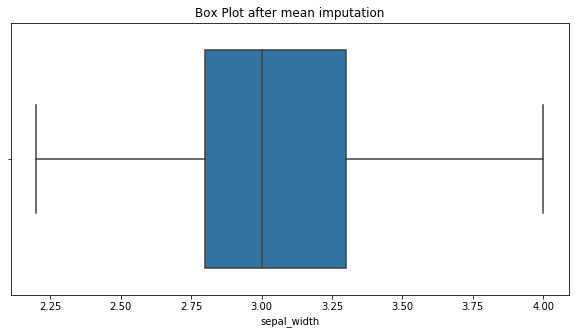

In [127]:
m = np.mean(df['sepal_width']) # or np.median(df['sepal_width']) or m=0 (replace with 0)
plt.figure(figsize=(10, 5))
for i in df['sepal_width']:
    if i > max_limit or i < min_limit:
        df['sepal_width'] = df['sepal_width'].replace(i, m)
fig = sns.boxplot(df['sepal_width'])
plt.title("Box Plot after mean imputation")
plt.show()   